In [1]:
%load_ext autoreload
%autoreload 2

c:\users\az55845\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DIVISIONS, select_scl5
from triple_agent.reports.stop_talks import stop_talk_in_game_percentage

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

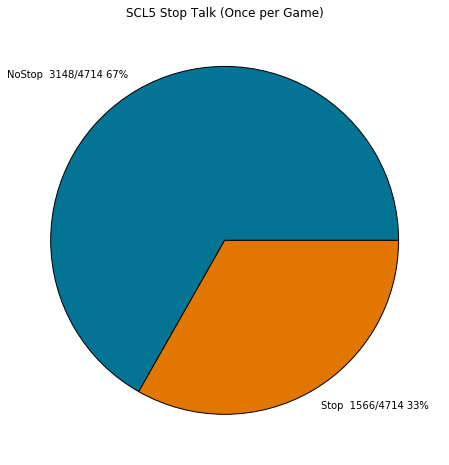

In [5]:
stop_talk_in_game_percentage(scl5_replays, "SCL5 Stop Talk (Once per Game)")

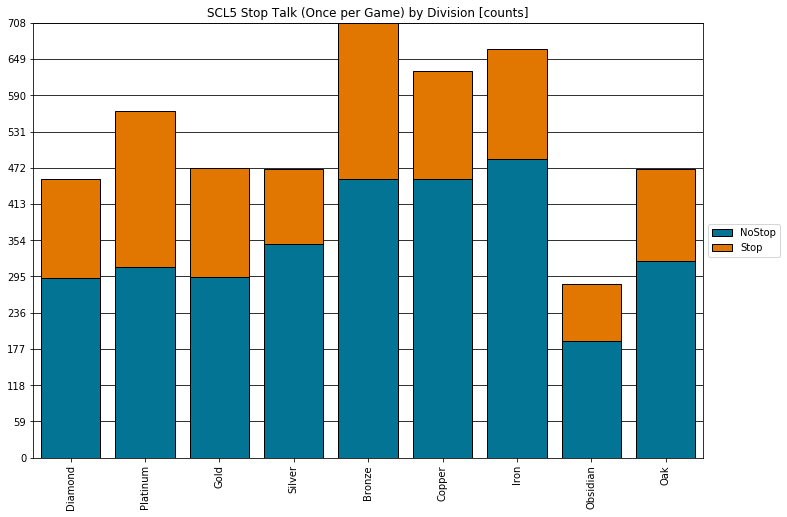

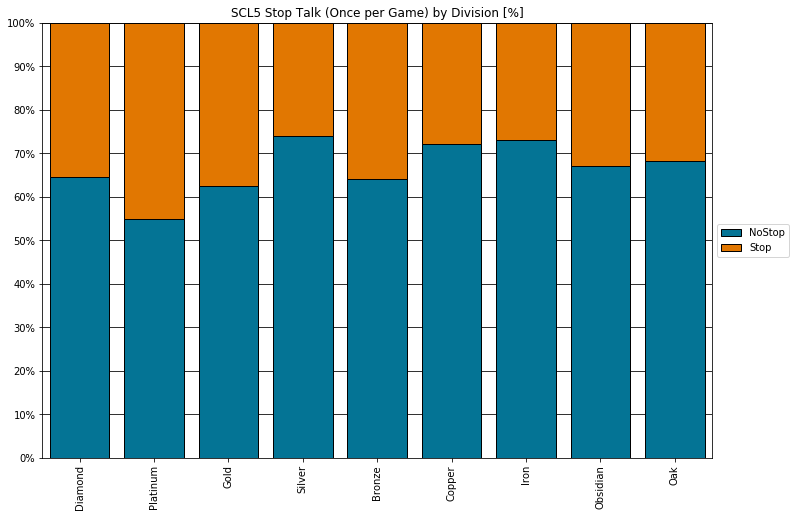

In [6]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Stop Talk (Once per Game) by Division',
    groupby=lambda g: g.division,
    category_name_order=lambda g: SCL5_DIVISIONS.index(g)
)

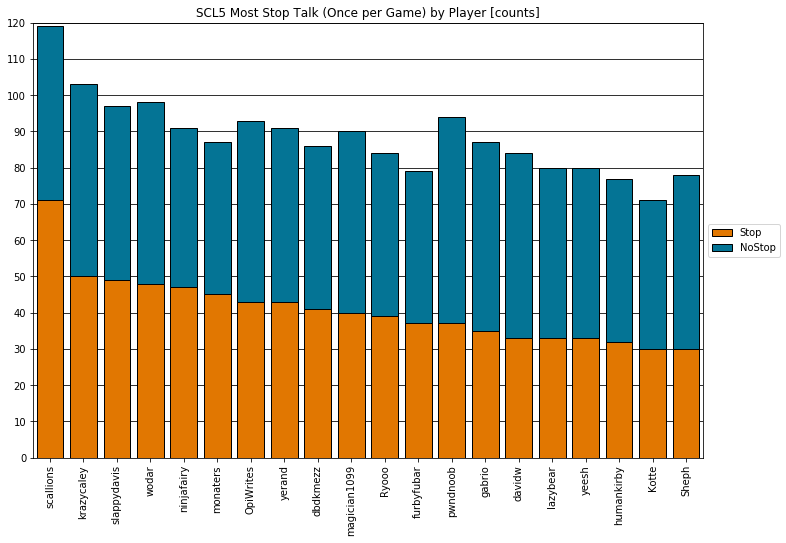

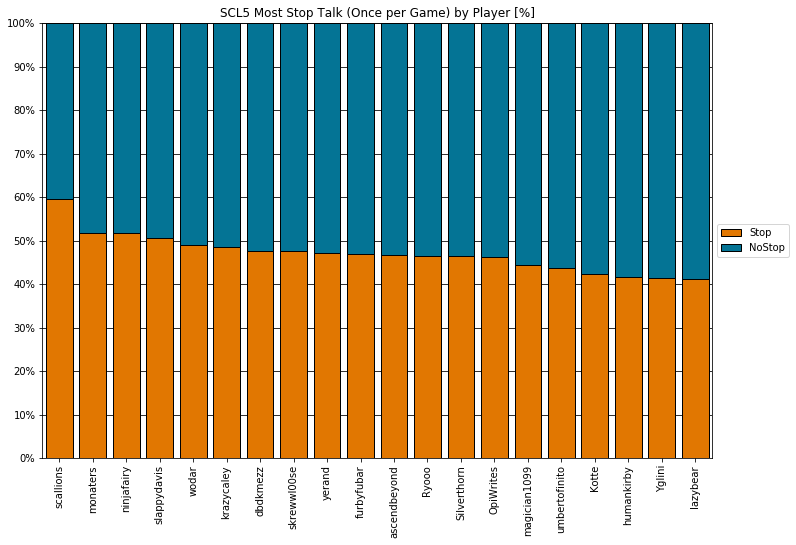

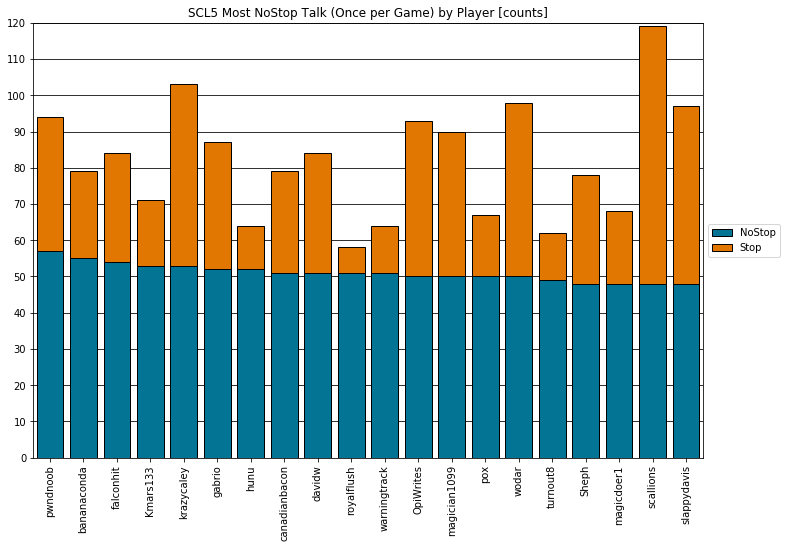

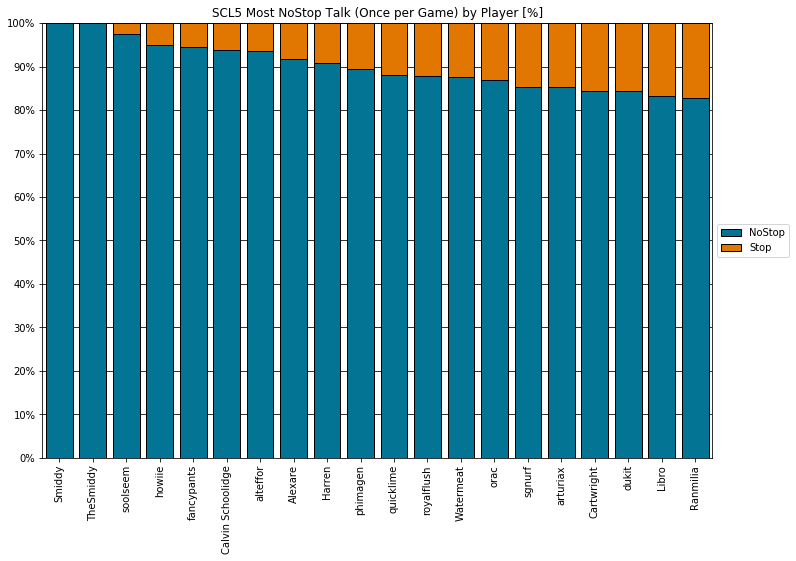

In [7]:
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most Stop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='Stop',
    data_stack_order = ['Stop','NoStop'],
    limit=20
)
stop_talk_in_game_percentage(
    scl5_replays,
    'SCL5 Most NoStop Talk (Once per Game) by Player',
    groupby=lambda g: g.spy,
    category_data_order='NoStop',
    limit=20
)